### Class Relationship
- whenever you create a big application like website app etc always there would be multiple classes in your application
- lets consider uber eats website 
    - first of all will use oop
    - second we would be using lot of classes
    - for every eintiy we would build a class
    - eg for users will create a class for restaurants will create a class for payment for delivery so there could be lot of classes
    - sometime this classes talk to each other there is some sort of relationship
    - so will study that in oop when we have multiple classes then what kind of relationship are possible between them

- so two types of relationships are possible
#### Class Relationship:(inheritance is kind of more famous than aggregation))
    1. aggregation
    2. Inheritance

### 1. Aggregation(Has-A relationship)
- this means one class owns the other class
- means one classs would be the owner other clas would be its property
- eg. we created a class name customer and address
    - what will the have a relationship
    - it would be **customer** has a address
    - so customer class owns the address class
    -  so whenever we are creating a application where one clas is owner of other class so relationship between this two would be called aggregation
- will understand this rlationship through a code

In [4]:
# Will create a Customer class
# The class will have a constructor (__init__) that will ask for the customer's name, gender, and address.
# These values will be stored in the respective variables (name, gender, address).

# The name and gender are simple text attributes.
# However, the address is a complex entity that can include details like home address, landmark, city, and pincode.
# Since there are multiple attributes involved in an address, we will create a separate class named Address.

class Customer:
    
    def __init__(self, name, gender, address):
        # Storing the name, gender, and address in the instance variables
        self.name = name
        self.gender = gender
        self.address = address
        
    def print_name_address(self):
        # Printing the customer's name, gender, and address details
        print(f"Name: {self.name}")
        print(f"Gender: {self.gender}")
        print("Address:")
        print(f"  City: {self.address.city}")
        print(f"  Pincode: {self.address.pin}")
        print(f"  State: {self.address.state}")

class Address:
    
    def __init__(self, city, pin, state):
        # Storing city, pin code, and state in the instance variables
        self.city = city
        self.pin = pin
        self.state = state

# Will create a Customer class object.
# To create a Customer object, we need to provide three things: name, gender, and address.
# We can easily pass the name and gender as text.
# But the address is not a simple text; it should be an object of the Address class.

# So, before creating a Customer object, we will create an object for the Address class.
# The Address object requires three things: city, pincode, and state.
# This Address object will then be passed to the Customer object.
# In this way, we are passing an object as an argument in our class constructor, and that object is used by our class.
# This scenario is called aggregation, where one class (Customer) contains a reference to another class (Address).

# Creating an Address object
add1 = Address('Boston', '02119', 'MA')

# Creating a Customer object with the name, gender, and address (add1)
cust = Customer('Saurabh', 'Male', add1)

# Printing the name and address details of the customer
cust.print_name_address()


Name: Saurabh
Gender: Male
Address:
  City: Boston
  Pincode: 02119
  State: MA


- suppose if we make city variable in address class private
- now if we do aggregation will this class print city


In [5]:
class Customer:
    
    def __init__(self, name, gender, address):
        # Storing the name, gender, and address in the instance variables
        self.name = name
        self.gender = gender
        self.address = address
        
    def print_name_address(self):
        # Printing the customer's name, gender, and address details
        print(f"Name: {self.name}")
        print(f"Gender: {self.gender}")
        print("Address:")
        print(f"  City: {self.address.__city}")
        print(f"  Pincode: {self.address.pin}")
        print(f"  State: {self.address.state}")

class Address:
    
    def __init__(self, city, pin, state):
        # Storing city, pin code, and state in the instance variables
        self.__city = city
        self.pin = pin
        self.state = state
        
# Creating an Address object
add1 = Address('Boston', '02119', 'MA')

# Creating a Customer object with the name, gender, and address (add1)
cust = Customer('Saurabh', 'Male', add1)

# Printing the name and address details of the customer
cust.print_name_address()


Name: Saurabh
Gender: Male
Address:


AttributeError: 'Address' object has no attribute '_Customer__city'

-  the answer is no
- we cannot access private attribute when we are performing aggregation
- soultion for this is create getter method for city

In [7]:
class Customer:
    
    def __init__(self, name, gender, address):
        # Storing the name, gender, and address in the instance variables
        self.name = name
        self.gender = gender
        self.address = address
        
    def print_name_address(self):
        # Printing the customer's name, gender, and address details
        print(f"Name: {self.name}")
        print(f"Gender: {self.gender}")
        print("Address:")
        print(f"  City: {self.address.get_city()}")
        print(f"  Pincode: {self.address.pin}")
        print(f"  State: {self.address.state}")

class Address:
    
    def __init__(self, city, pin, state):
        # Storing city, pin code, and state in the instance variables
        self.__city = city
        self.pin = pin
        self.state = state
        
    def get_city(self):
        return self.__city
        
# Creating an Address object
add1 = Address('Boston', '02119', 'MA')

# Creating a Customer object with the name, gender, and address (add1)
cust = Customer('Saurabh', 'Male', add1)

# Printing the name and address details of the customer
cust.print_name_address()


Name: Saurabh
Gender: Male
Address:
  City: Boston
  Pincode: 02119
  State: MA


- so if you are performing aggregation it does not guarantee that the class you are owning you can also fetch its private attributes
- no we cant fetch

- will see next how we cann smartly access methods during aggregation
- here wil create a method edit_profile whiose work would be basically to edit profile

In [11]:
class Customer:

    def __init__(self, name, gender, address):
        self.name = name
        self.gender = gender
        self.address = address

    def print_profile(self):
        print(f"Name: {self.name}")
        print(f"Address: {self.address.get_city()}, {self.address.pin}, {self.address.state}")

    def edit_profile(self, new_name, new_city, new_pin, new_state):
        self.name = new_name
        self.address.edit_address(new_city, new_pin, new_state)

class Address:

    def __init__(self, city, pin, state):
        self.__city = city
        self.pin = pin
        self.state = state

    def get_city(self):
        return self.__city

    def edit_address(self, new_city, new_pin, new_state):
        self.__city = new_city
        self.pin = new_pin
        self.state = new_state

add1 = Address('Boston', '02119', 'MA')
cust = Customer('Saurabh', 'Male', add1)

# Print original profile
cust.print_profile()

# Edit profile with new details
cust.edit_profile('Chavan', 'Mumbai', '600700', 'MH')

# Print updated profile
cust.print_profile()


Name: Saurabh
Address: Boston, 02119, MA
Name: Chavan
Address: Mumbai, 600700, MH


### Aggregation class diagram
- minus represent this are private varibales
- in our case we just made name as private but generally all data attributes are made private
- plus represent they are public can be used out of the class
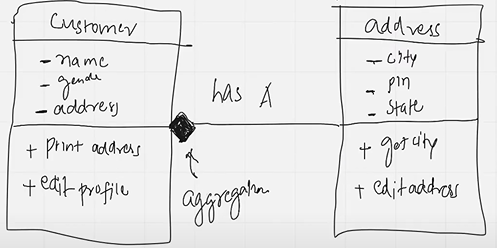